<a href="https://colab.research.google.com/github/daphnecor/Probabilistic/blob/main/ProbabilisticDeepLearning_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
Dependencies
'''
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Plotting aesthetics
cs = ['#0E1D33', '#4593E9', '#F0321D', '#73BA80', '#438A6F', '#183D51']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cs)
np.set_printoptions(suppress=True, precision=3)
sns.set_context('notebook', font_scale = 1.2, rc = {'lines.linewidth':2}), sns.set_style('white');

# 2 Variational inference

### Our point of departure

Bayesian inference often works well when we care not only about what we know, but also _how well_ we know it. It is often used together with expert information, introduced as priors into our models. The main challenge with performing Bayesian inerence is that we want methods that are both **fast** and **reliable** (trustworthy). 

_Variational Bayes_ is a popular family of methods because they satisfy both of these aspects: they are fast and generally work well. Let's recap what we have been doing so far. 

#### Bayesian inference

Bayesian inference can be broken down into three steps:
- **1.** Build a model: choose a prior & likelihood
- **2.** Compute the posterior
- **3.** Report a summary, e.g. posterior means and (co)variances as uncertainty

**Step 1** \\
The goal of Bayesian inference is to identify the unknowns, our parameters, collected in a vector $\boldsymbol{\theta}$. We also have some intial beliefs about the parameters $\boldsymbol{\theta}$, which is expressed as the prior distribution: $p(\boldsymbol{\theta})$. Finally, we have our likelihood $p(y_{1:N} \mid \boldsymbol{\theta})$, which tells us how the data relates to the parameters $\boldsymbol{\theta}$. The model is then 

\begin{align}
  \text{posterior} &\propto \text{ likelihood } \times \text{ prior}   \Leftrightarrow \\ p(\boldsymbol{\theta} \mid y_{1:N}) &\propto  p(y_{1:N} \mid \boldsymbol{\theta}) p(\boldsymbol{\theta})
\end{align}

The main idea is that, by updating the posterior (applying Bayes' theorem) in an iterative way, we will learn more and more (i.e. reduce uncertainty) about our parameters $\boldsymbol{\theta}$. This can be visualised in two dimensions like this: 


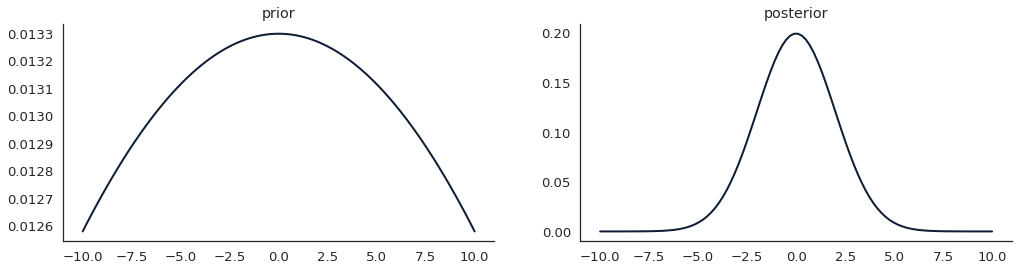

In [3]:
#@title The more we know about theta, the smaller the variance of our distribution.
x = np.linspace(-10, 10, 100)
prior = stats.norm.pdf(x, loc=0, scale=30)
posterior = stats.norm.pdf(x, loc=0, scale=2)

fig, axs = plt.subplots(1, 2, figsize=(17, 4))
axs[0].set_title(r'prior')
axs[0].plot(x, prior)
axs[1].set_title(r'posterior')
axs[1].plot(x, posterior)
sns.despine()


**Steps 2 & 3** \\
We have seen before that steps 2 and 3 are challenging because we typically don't have a closed form of the partition sum $p(y_{1:N})$ (normalizing constant) and high dimensional integration is intractable/infeasible. Thus, we turn to approximate methods. 

### Approximate Bayesian inference

The gold standard for performing approximate Bayesian inference is through Markov Chain Monte Carlo (MCMC) algorithms. These algorithms are eventually accurate but can be slow. Instead, Bayesian inference can be formulated as an optimization problem, where the goal is to approximate the posterior with a "nice" distribution $q^*$

Where a "nice" distribution refers to a distribution for which we can compute the mean and covariance. Our exact distribution is not a nice distribution (it's not easy to compute the means and covariances for it). 

The essence is that we approximate the exact distribution $p(\theta \mid y)$ with the closest distribution $q^*$ that is nice. We can formalize this as an optimization problem, where we intend to minimize a statistical divergence $f$ between the "nice" approximate distibution and the exact one

\begin{align}
  q^* = \underset{q \in Q}{\text{ arg min }} \color{red}{f} (q(.), p(. \mid y))
\end{align}

where $\color{red}{f}$ is chosen to be the KL divergence in Variational Bayes:
\begin{align}
  \color{red}{D_{\text{KL}}}(q(.) || p(. \mid y))
\end{align}

Besides the fact that de KL divergence works well in practice, there is another reason we use is as our choice of divergence metric. Let's look at the definition of the KL

\begin{align}
  D_{\text{KL}} (q(.) || p(. \mid y)) &\equiv \int q(\theta) \log \frac{q(\theta)}{p(\theta \mid y)} d\theta
\end{align}

but wait, in order to compute this we need the exact posterior! This is a problem because if we would have known that, we wouldn't have to do approximate inference in the first place! This is not only a problem with the KL div, but with any metric. How can we circumvent this problem?

\begin{align}
  D_{\text{KL}} (q(.) || p(. \mid y)) &\equiv \int q(\theta) \log \frac{q(\theta)}{p(\theta \mid y)} \\
  &= \int q(\theta) \log \frac{q(\theta) p(y)}{p(\theta, y)} d\theta \\
  &= \log p(y) - \int q(\theta) \log \frac{p(\theta, y)}{q(\theta)} d\theta \\
  &= 
\end{align}


## A: Bayesian inference by gradient descent




## B: Stochastic variational inference

---
---


See Mackay Chapter **33**: _Variational Methods_.

```python
05.2021 | Daphne Cornelisse
```